In [10]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import figure

import sys
sys.path.append('../utilities/')
import column_name_mapping as u_cnm
import general_tools as u_gt
import dataframe_operations as u_do
import data_types as u_dt

In [2]:
data_raw    = pd.read_csv(Path.cwd() / '..' / 'data' / 'ml_case_training_data.csv')
output_raw = pd.read_csv(Path.cwd() / '..' / 'data' / 'ml_case_training_output.csv')
df = data_raw.merge(output_raw, how='inner', on='id')

In [35]:
summary = u_dt.dtype_summarizer(df)
summary.cols_of_type('float64')

Available dtypes: ['object', 'float64', 'int64']


['campaign_disc_ele',
 'forecast_base_bill_ele',
 'forecast_base_bill_year',
 'forecast_bill_12m',
 'forecast_cons',
 'forecast_cons_12m',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'net_margin',
 'pow_max']

Alert: campaign_disc_ele is completely empty


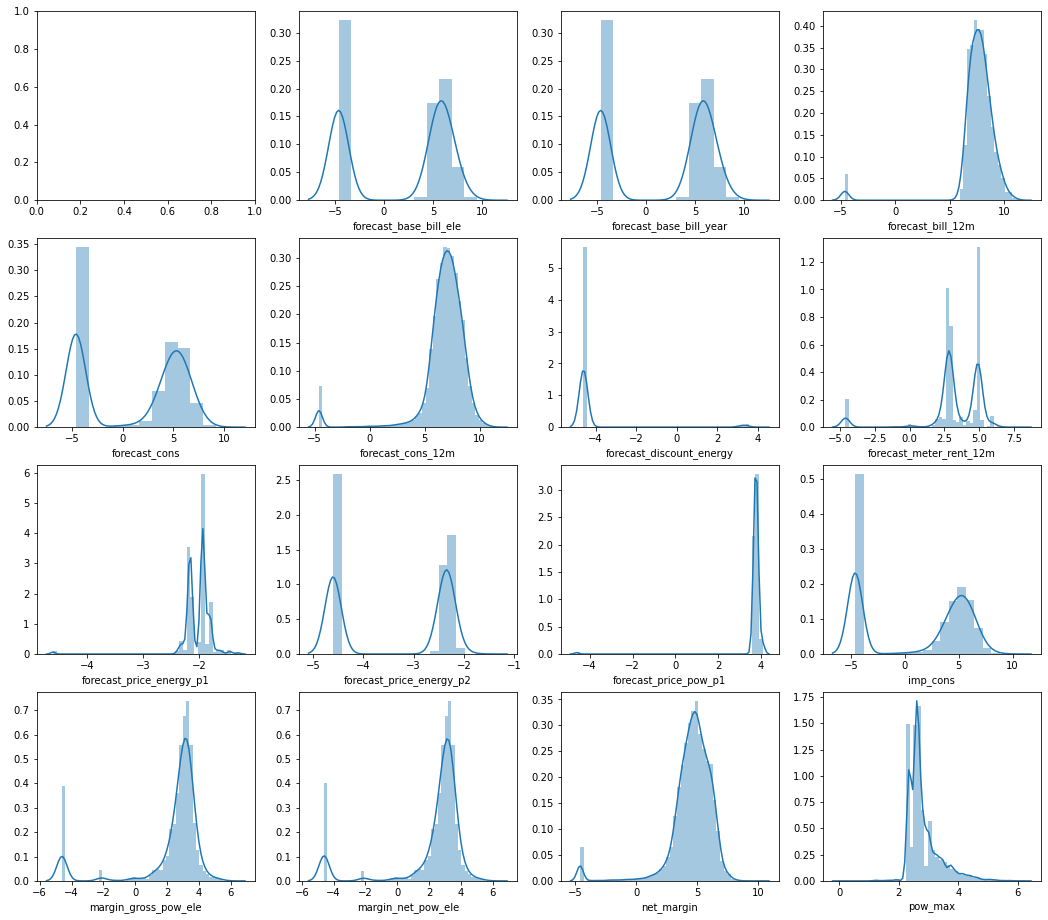

In [70]:
cols = summary.cols_of_type('float64')
subplot_cols = 4
subplot_rows = int(np.ceil(len(cols) / subplot_cols))

default_fig_width, default_fig_height = plt.rcParams.get('figure.figsize')
new_figsize = (3 * default_fig_width, default_fig_height * subplot_rows)
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=new_figsize)
for i in range(len(cols)):
    col = cols[i]
    
    if sum(~df[col].isna()) == 0:
        print('Alert:', col, 'is completely empty')
        continue
    
    subplot_row = i // subplot_cols
    subplot_col = i % subplot_cols
    subplot_index = (subplot_row, subplot_col)
    if subplot_rows == 1:
        subplot_index = subplot_col
    sns.distplot(u_gt.cap_and_log(df[col]), ax=axes[subplot_index])

# for x in range(15):
#     print(x, ' -->  row:', x // 3, '    col:', x % 3)


In [56]:
# col = 'forecast_base_bill_ele'
# print('Outlier analysis for', col)

# new_figsize = (lambda x, y: (2 * x, y))(*plt.rcParams.get('figure.figsize'))
# fig, axes = plt.subplots(1, 2, figsize=new_figsize)
# sns.boxplot(df[col], ax=axes[0])
# sns.distplot(df[col], ax=axes[1])
# plt.show()

# np.quantile(df[col], [0.25, 0.75])
# inter_quartile_range = 